In [1]:
import pandas as pd
import numpy as np
import os, glob

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mypath = os.getcwd()
customers = pd.read_csv(mypath+'/customers_merchants/customers.csv', delimiter = '|') # Customer profiles
static_merchants = pd.read_csv(mypath+'/customers_merchants/merchants_static.csv', delimiter = '|') # Merchant profiles

In [3]:
customers.head()

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,acct_num,profile
0,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Stockton,CA,95207,37.995205,-121.214545,357430,Accounting technician,2002-10-03,888022315787,young_adults_male_urban.json
1,715-55-5575,4351161559407816183,Elaine,Fuller,F,310 Kendra Common Apt. 164,Ruther Glen,VA,22546,37.813601,-77.589731,15850,Professor Emeritus,1952-06-07,917558277935,adults_50up_female_urban.json
2,167-48-5821,4192832764832,Melinda,Cameron,F,05641 Robin Port,Muncie,IN,47304,40.170985,-85.387114,93768,International aid/development worker,1994-05-30,718172762479,adults_2550_female_urban.json
3,406-83-7518,4238849696532874,Brandon,Williams,M,26916 Carlson Mountain,Melbourne,FL,32934,28.139675,-80.715306,139650,Seismic interpreter,1991-12-26,947268892251,adults_2550_male_urban.json
4,697-93-1877,4514627048281480,Lee,Hernandez,M,809 Burns Creek,Bronx,NY,10472,40.877373,-73.910374,1382480,Medical laboratory scientific officer,2001-05-22,888335239225,young_adults_male_urban.json


In [4]:
len(customers)

10000

In [5]:
static_merchants.describe()

,lat,long,fraud_risk
count,136340.000000,136340.000000,136340.000000
mean,37.762540,-91.426581,0.035191
std,5.234843,15.985863,0.184264
min,19.057284,-165.123247,0.000000
25%,33.957137,-97.610393,0.000000
50%,38.765278,-86.967748,0.000000
75%,41.484573,-80.025794,0.000000
max,63.840085,-67.697989,1.000000


In [6]:
static_merchants.lat.nunique()


136340

In [7]:
static_merchants.long.nunique()

136340

In [8]:
# Make sure we do have 134780 different merchants

len(static_merchants)

136340

In [9]:
len(static_merchants[static_merchants['fraud_risk'] == 1])/len(static_merchants) # Percentage of compromised merchants

0.035191433181751504

Text(0, 0.5, 'lat')

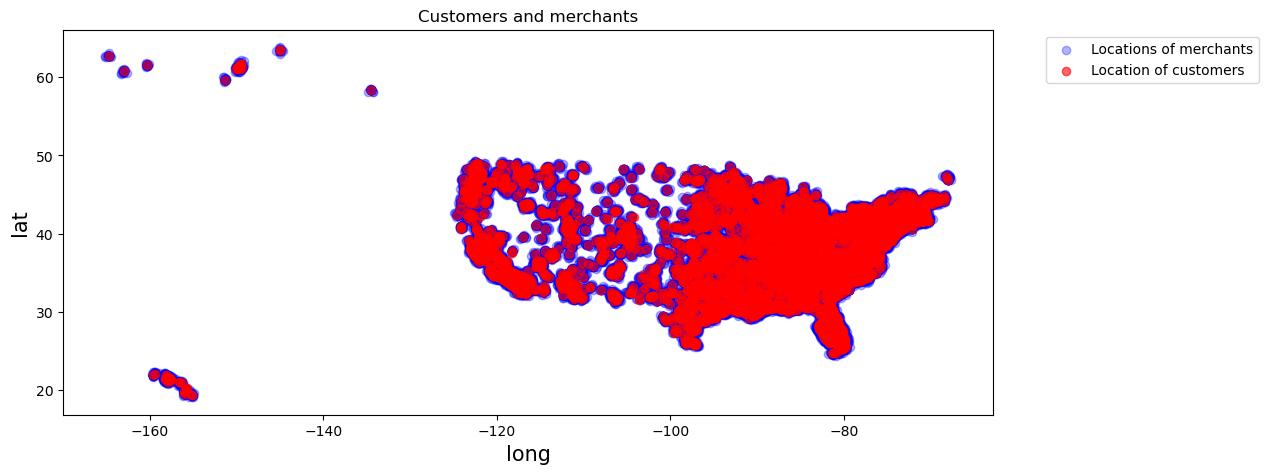

In [10]:
# Draw all the positions of customers and merchants
merchants_vs_customer_fig, ax = plt.subplots(figsize=(12,5))

# Plot locations of terminals
ax.scatter(static_merchants.long.values, 
           static_merchants.lat.values, 
           color='blue', alpha = 0.3, label = 'Locations of merchants')

# Plot location of the last customer

ax.scatter(customers.long, 
           customers.lat, 
           color='red',alpha = 0.6,label="Location of customers")

ax.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1))

fontsize=15

ax.set_title("Customers and merchants")
ax.set_xlabel('long', fontsize=fontsize)
ax.set_ylabel('lat', fontsize=fontsize)

# A nice shape of the United States. Including Hawaii.

In [11]:
files = glob.glob(mypath + "/data/*.csv")

In [12]:
len(files)

120

In [13]:
# Concate all the .csv files
content = []

for filename in files:
    
    df = pd.read_csv(filename, index_col=None, sep='|')
    content.append(df)

df = pd.concat(content)

/tmp/ipykernel_3675174/2879057625.py:6: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, index_col=None, sep='|')


In [14]:
len(df)

4285032

In [19]:
df.reset_index(drop = True, inplace = True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4285032 entries, 0 to 4285031
Data columns (total 27 columns):
 #   Column      Dtype  
---  ------      -----  
 0   ssn         object 
 1   cc_num      object 
 2   first       object 
 3   last        object 
 4   gender      object 
 5   street      object 
 6   city        object 
 7   state       object 
 8   zip         object 
 9   lat         float64
 10  long        float64
 11  city_pop    object 
 12  job         object 
 13  dob         object 
 14  acct_num    object 
 15  profile     object 
 16  trans_num   object 
 17  trans_date  object 
 18  trans_time  object 
 19  unix_time   object 
 20  category    object 
 21  amt         float64
 22  is_fraud    object 
 23  merchant    object 
 24  merch_lat   float64
 25  merch_long  float64
 26  is_online   object 
dtypes: float64(5), object(22)
memory usage: 882.7+ MB


In [21]:
df.category.value_counts() # Category counts

shopping_pos      422205
home              402737
grocery_pos       401826
kids_pets         373258
gas_transport     367256
food_dining       320239
shopping_net      313640
entertainment     312732
personal_care     305089
misc_pos          281861
health_fitness    267155
misc_net          195172
grocery_net       184882
travel            136980
Name: category, dtype: int64

In [22]:
df.is_fraud.unique()

array(['0', 'risk:high', 'risk:moderate', '1', 'group:vulnerable', 0, 1],
      dtype=object)

In [23]:
# Need to go to 5000
(df.is_fraud == 'risk:moderate').sum()

5514

In [24]:
# Need to go to 3000
(df.is_fraud == 'risk:high').sum()

3707

In [25]:
# Need to go to 9000
(df.is_fraud == 'group:vulnerable').sum()

9282

In [26]:
df[df.is_fraud == 'group:vulnerable'].ssn.nunique() # 3708 people generated 90000 fraud transactions

2823

In [27]:
(df.is_fraud == '1').sum()

9207

In [29]:
(df.is_fraud == 1).sum()

45

In [30]:
# The percentage of fraud transactions. If unsatisfied, one can tune the parameters in the program to guarantee a desired results

((df.is_fraud == 'risk:moderate').sum() + (df.is_fraud == 'risk:high').sum() + 
(df.is_fraud == 'group:vulnerable').sum() + (df.is_fraud == '1').sum() + 
(df.is_fraud == 1).sum()) / len(df)

0.006477197836562247

In [31]:
(df.is_online == 1).sum()/len(df)

0.24553585597493788

301-38-2013


Text(0, 0.5, 'lat')

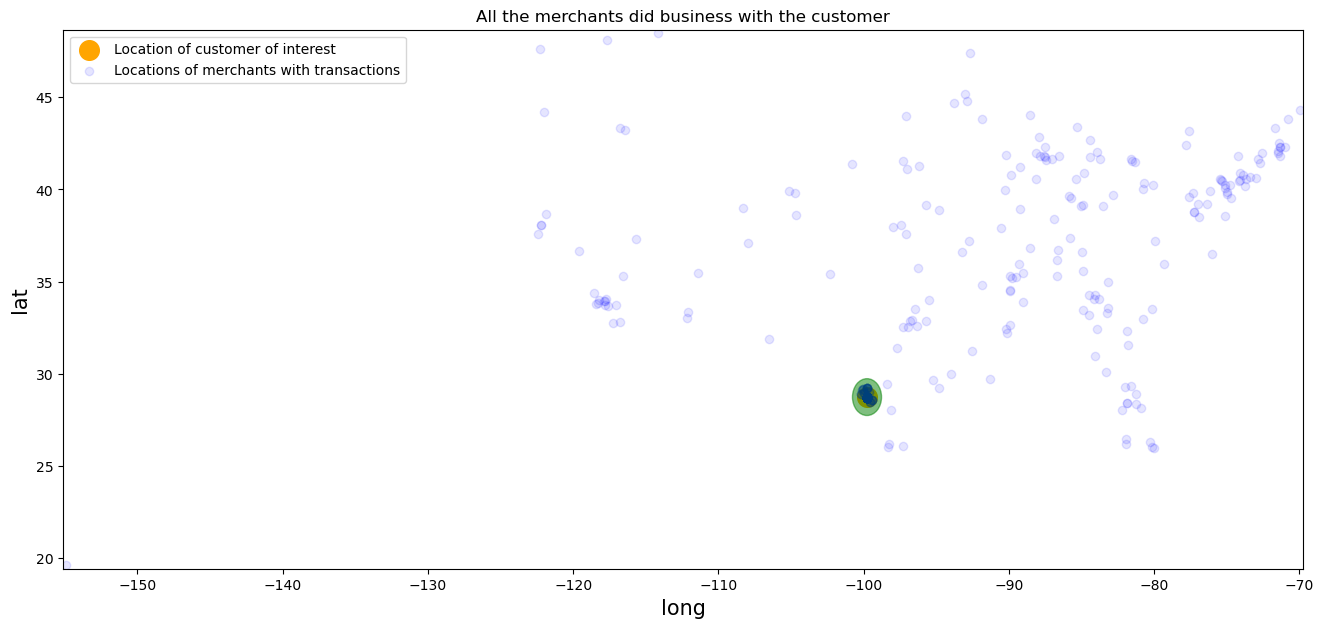

In [33]:
# Pick a random customer with fraud transactions
ssn = df[df.is_fraud != '0'].sample(1)['ssn'].values[0]
print(ssn)
df[df.is_fraud == 1].ssn.nunique() # Most of the generated customers encountered fraud scenario in this round

merchants_available_to_customer_fig, ax = plt.subplots(figsize=(16,7))

df_customer = df[df.ssn == ssn].copy()

customer_lat = df_customer.iloc[0]['lat']
customer_long = df_customer.iloc[0]['long']

# Plot 
ax.scatter(customer_long, 
           customer_lat, 
           color='orange',s = 200, label="Location of customer of interest")

# Plot locations of terminals
ax.scatter(df_customer['merch_long'], 
           df_customer['merch_lat'], 
           color='blue', alpha = 0.1, label = 'Locations of merchants with transactions')

ax.legend(loc = 'upper left')

# Plot the region within a radius of 111km (1degree) of the last customer
circ = plt.Circle((customer_long, customer_lat), radius=1, color='g', alpha=0.5)
ax.add_patch(circ)

fontsize=15

ax.set_title("All the merchants did business with the customer")
ax.set_xlim([df_customer['merch_long'].min()-0.2, df_customer['merch_long'].max()+0.2])
ax.set_ylim([df_customer['merch_lat'].min()-0.2, df_customer['merch_lat'].max()+0.2])
    
ax.set_xlabel('long', fontsize=fontsize)
ax.set_ylabel('lat', fontsize=fontsize)

Text(0, 0.5, 'lat')

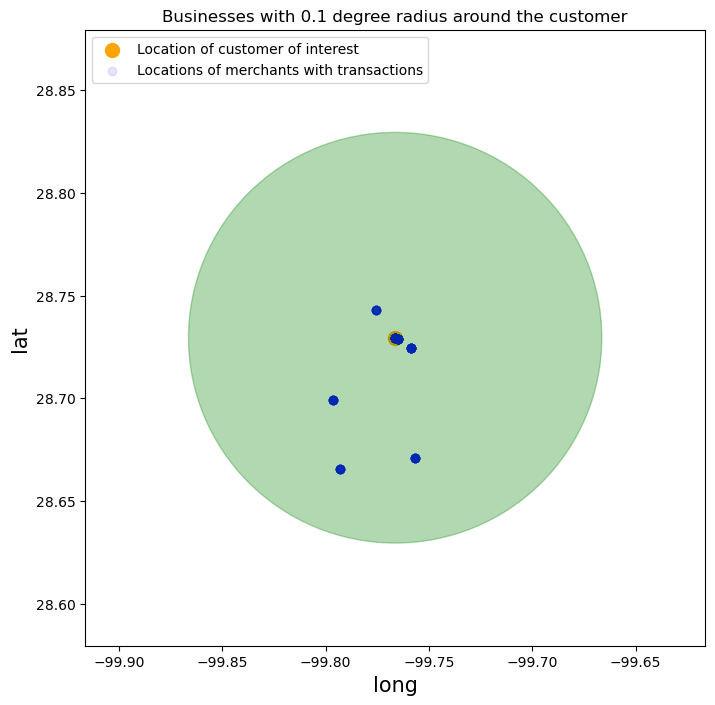

In [34]:
# Zoom in

merchants_available_to_customer_fig, ax = plt.subplots(figsize=(8,8))


# Plot 
ax.scatter(customer_long, 
           customer_lat, 
           color='orange',s = 100, label="Location of customer of interest")

# Plot locations of terminals
ax.scatter(df_customer['merch_long'], 
           df_customer['merch_lat'], 
           color='blue', alpha = 0.1, label = 'Locations of merchants with transactions')

ax.legend(loc = 'upper left')

# Plot the region within a radius of 111km (1degree) of the last customer
circ = plt.Circle((customer_long, customer_lat), radius=0.1, color='g', alpha=0.3)
ax.add_patch(circ)

fontsize=15

ax.set_title("Businesses with 0.1 degree radius around the customer")
ax.set_xlim([customer_long-0.15, customer_long+0.15])
ax.set_ylim([customer_lat.min()-0.15, customer_lat+0.15])
    
ax.set_xlabel('long', fontsize=fontsize)
ax.set_ylabel('lat', fontsize=fontsize)